<h2 align='center'> Diabetes Dataset </h2>

### Objective 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
df = pd.read_csv('Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**It is a Classification Problem - the Dependent variable is Outcome**

* **Shape of Dataset**

In [32]:
df.shape

(768, 9)

* **The dataset has total 768 rows & 9 Attributes** 

* **Checking Information of Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Dataset has 2 Float columns, 7 integer columns

## Data preprocessing

#### checking null values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There is no null values

### Spliting data 

In [33]:
x = df.drop(['Outcome'], axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
y = df.iloc[:,-1:]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### By Standardising features

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
sc_input = sc.fit_transform(df.drop(['Outcome'], axis = 1))
sc_input

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [37]:
df_input = pd.DataFrame(sc_input, columns= df.columns[:-1])
df_input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Spliting into training and test data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df['Outcome'], test_size=0.30)

In [39]:
print("Dataset shape:", df.shape)
print("Input Features shape: ", X_train.shape, y_train.shape)
print("Output Features shape: ", X_test.shape, y_test.shape)

Dataset shape: (768, 9)
Input Features shape:  (537, 8) (537,)
Output Features shape:  (231, 8) (231,)


## Applying KNN for K=1

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)

#### Training and Predicting 

In [42]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print('\n Accuracy Score:',  accuracy_score(y_test, pred))

print("\n Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

print('\n Classification Report: ')
print(classification_report(y_test, pred))


 Accuracy Score: 0.7142857142857143

 Confusion Matrix: 
[[117  30]
 [ 36  48]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       147
           1       0.62      0.57      0.59        84

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.71      0.71       231



### Analysing Visually by Error rate

In [43]:
error_rate = [ ]
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, df_input , df['Outcome'], cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

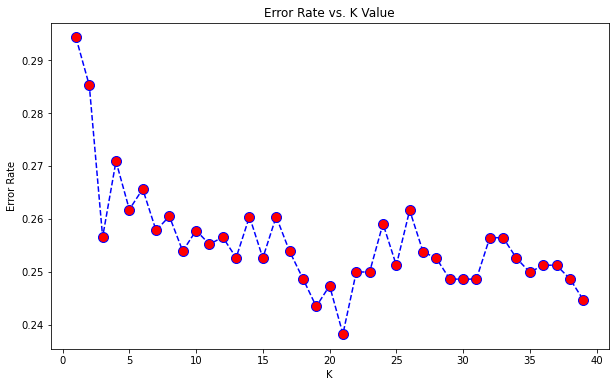

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

k > 27 error rate keeps decreasing. now finding clasification report at k=27

In [63]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n Accuracy Score:',  accuracy_score(y_test, pred))

print('\n Confusion Matrix:')
print(confusion_matrix(y_test,pred))

print('\n Classification Report:')
print(classification_report(y_test,pred))

WITH K=27

 Accuracy Score: 0.7575757575757576

 Confusion Matrix:
[[135  12]
 [ 44  40]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       147
           1       0.77      0.48      0.59        84

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.74       231



In [64]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6972789115646258

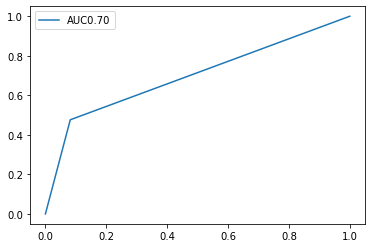

In [65]:
plt.plot(fpr, tpr, label='AUC%0.2f'%roc_auc)
plt.legend()
plt.show()

### Applying Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

### Fitting model

In [54]:
clf.fit(X_train,y_train)

LogisticRegression()

### Predicting values

In [55]:
ypred = clf.predict(X_test)

In [56]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

### Accuracy of logistic regression

In [26]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, ypred)

0.7619047619047619

In [58]:
print(confusion_matrix(y_test, ypred))

[[124  23]
 [ 32  52]]


In [59]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       147
           1       0.69      0.62      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



In [60]:
from sklearn import metrics

In [61]:
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.7312925170068029

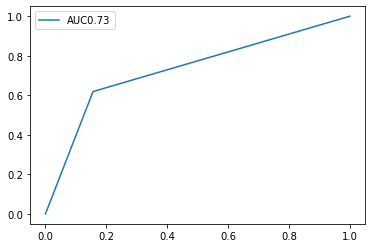

In [62]:
plt.plot(fpr, tpr, label='AUC%0.2f'%roc_auc)
plt.legend()
plt.show()